## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)


In [3]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:

classifier=Sequential()
input_shape=(32,32,3)

#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1,1), padding='same',input_shape=input_shape))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization(momentum=0.99, epsilon=0.001))
classifier.add(Activation('relu'))

#卷積組合
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1,1), padding='same'))
classifier.add(BatchNormalization(momentum=0.99, epsilon=0.001))
classifier.add(Activation('relu'))

'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(100)) #output_dim=100,activation=relu
classifier.add(Activation('relu'))

#輸出
classifier.add(Dense(output_dim=10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=100)















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`




Epoch 1/100
50000/50000 [==============================] - 13s 263us/step - loss: 7.1960 - acc: 0.3440
Epoch 2/100
50000/50000 [==============================] - 7s 147us/step - loss: 3.7232 - acc: 0.4276
Epoch 3/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.0658 - acc: 0.6234
Epoch 4/100
50000/50000 [==============================] - 7s 149us/step - loss: 0.9024 - acc: 0.6847
Epoch 5/100
50000/50000 [==============================] - 7s 147us/step - loss: 0.8063 - acc: 0.7171
Epoch 6/100
50000/50000 [==============================] - 7s 149us/step - loss: 0.7315 - acc: 0.7448
Epoch 7/100
50000/50000 [==============================] - 7s 150us/step - loss: 0.6611 - acc: 0.7691
Epoch 8/100
50000/50000 [==============================] - 7s 149us/step - loss: 0.5951 - acc: 0.7919
Epoch 9/100
50000/50000 [==============================] - 7s 149us/step - loss: 0.5266 - acc: 0.8181
Epoch 10/100
50000/50000 [==============================] - 7s 149us/step - los

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [16]:
print(x_test.shape) #(50000, 32, 32, 3)

## Normalize Data
def normalize(X_test):
        mean = np.mean(X_test,axis=(0,1,2,3))
        std = np.std(X_test, axis=(0, 1, 2, 3))
        X_test = (X_test-mean)/(std+1e-7) 
        return X_test,mean,std
    
    
## Normalize Training and Testset    
x_test,mean_test,std_test = normalize(x_test) 

(10000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


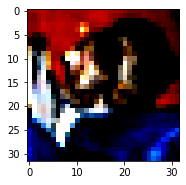

In [17]:
# show image
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(121)
plt.grid(False)
plt.imshow(x_test[0])

In [21]:
# input_example=(np.zeros(shape=(1,32,32,3))-mean_test)/(std_test+1e-7)
input_example = x_test
classifier.predict(input_example)[:10]

array([[7.28131773e-18, 1.03810934e-19, 5.18732975e-19, 1.00000000e+00,
        1.36977449e-18, 1.47932068e-14, 3.39845373e-14, 3.05242862e-20,
        1.24467270e-10, 7.48515970e-26],
       [5.32585911e-12, 7.09537929e-03, 1.48852095e-22, 2.05039780e-23,
        3.98732875e-25, 7.38642041e-29, 2.78362823e-23, 6.09658037e-32,
        9.92904603e-01, 4.77658375e-08],
       [7.40908581e-06, 9.99990225e-01, 2.58373672e-13, 1.41270199e-12,
        2.12185460e-11, 1.73419108e-18, 7.25426007e-21, 1.41881548e-12,
        2.39452015e-06, 1.22090171e-09],
       [4.34421061e-04, 6.24239445e-04, 5.76250547e-10, 4.91232163e-13,
        2.38749537e-12, 1.01386967e-24, 1.18436594e-10, 7.65362136e-16,
        9.98940408e-01, 9.47080878e-07],
       [0.00000000e+00, 0.00000000e+00, 1.30740500e-21, 2.43943983e-17,
        2.07217445e-17, 2.53228264e-26, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.99925705e-24, 4.55857911e-20, 1.26259495e-12, 2.01089510e-11,
   